# Exercise 3.1: 
We will show that equation (6) in the task description is a solution of the diffusion equation by simply inserting it into the equation with constant diffusion coefficient, since the coefficient $D$ is independent of x in the solution. 

To show that 

$\phi(x,t) = \frac{1}{\sqrt{4\pi Dt}} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}}$

is a solution of

$\frac{\partial \phi(x, t)}{\partial t} = D\frac{\partial^2\phi(x,t)}{\partial^2x}$,

we first calculate

$\frac{\partial \phi(x, t)}{\partial t} = -\frac{1}{2} \frac{1}{\sqrt{4\pi Dt}} \frac{1}{t} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}} + \frac{1}{\sqrt{4\pi Dt}} \frac{1}{t^2}\int^{+\infty}_{-\infty}dy\,h(y) \, \frac{(x-y)^2}{4D}e^{-\frac{(x-y)^2}{4Dt}} = \frac{1}{\sqrt{4\pi Dt}}(\frac{1}{t^{2}} \int^{+\infty}_{-\infty}dy\,h(y)\,\frac{(x-y)^2}{4D}e^{-\frac{(x-y)^2}{4Dt}} - \frac{1}{2t} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}})$.

Then we find

$\frac{\partial\phi(x,t)}{\partial x} = \frac{1}{\sqrt{4\pi Dt}} (-\frac{1}{4Dt}) \int^{+\infty}_{-\infty}dy\,h(y)\,(2x-2y)e^{-\frac{(x-y)^2}{4Dt}}$

$\implies \frac{\partial^2 \phi(x,t)}{\partial^2 x} = \frac{1}{\sqrt{4\pi Dt}}\frac{1}{4Dt}(-\int^{+\infty}_{-\infty}dy\,h(y)\,2e^{-\frac{(x-y)^2}{4Dt}} + \int^{+\infty}_{-\infty}dy\,h(y)\,\frac{(2x-2y)^2}{4Dt}e^{-\frac{(x-y)^2}{4Dt}}) = \frac{1}{D\sqrt{4\pi Dt}}(\frac{1}{t^{2}} \int^{+\infty}_{-\infty}dy\,h(y)\,\frac{(x-y)^2}{4D}e^{-\frac{(x-y)^2}{4Dt}} - \frac{1}{2t} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}})$.

It is apparent that the expression (6) is a solution of the equation:

$\implies \frac{\partial \phi(x, t)}{\partial t} = D\frac{\partial^2\phi(x,t)}{\partial^2x}$ $$\tag*{$\blacksquare$}$$


This soulution (6) of the diffusion equation can also be found by applying a Fourier transform to the diffusion equation. By finding the solution this way, it becomes apparent from the beginning of the calculations that h(x) represents the initial distribution of the particles, before the diffusion begins. This means that h(y) gives the contribution of each point in y-space (the space the Fourier transform transforms the distribution h(x) into) to the diffusion process or, in other words, gives the position of each particle during the diffusion process. 


# Exercise 3.2:
The probability of finding a particle in position $x$ in a potential landscape $V(x)$ is given by $P(x) = Ze^{-\beta V(x)}$, where $Z$ is the canonical partition function of the system and $\beta = (k_B T)^{-1}$.

During a random walk the probability of a particle moving in the positive direction, staying put or moving in the negative direction is, respectively, $\{p^{+}, p^{0}, p^{-}\}$. Normalization dictates that their combined sum should equal one. This means the probabilities must satisfy the equation 

\begin{equation}\label{eq1}\tag{1}
p^{+} + p^{0} + p^{-} = 1.
\end{equation}

We assume that each of the probabilities are proportional to $P(x)$ and that the proportionality constant, $C$, is equal for all steps. If the position before a random walk step is $x_0$ we get 


\begin{equation}
  \begin{aligned}
    p^{+} & =CP(x_0+1) \\
    p^{0} & =CP(x_0) \\
    p^{-} & =CP(x_0-1) 
    \label{eq2}
  \end{aligned}
\end{equation}

By putting these expressions into equation \eqref{eq1} we find the constant 

\begin{equation}\label{eq3}\tag{2}
C=\frac{1}{P(x_0+1)+P(x_0)+P(x_0-1)}
\end{equation}

and the desired probabilities

\begin{equation}
  \begin{aligned}
    p^{+} &=\frac{P(x_0+1)}{P(x_0+1)+P(x_0)+P(x_0-1)} = \frac{1}{1+e^{-\beta [V(x_0-1)-V(x_0+1)]}+e^{-\beta [V(x_0)-V(x_0+1)]}} \\
    p^{0} &=\frac{P(x_0)}{P(x_0+1)+P(x_0)+P(x_0-1)} = \frac{1}{1+e^{-\beta [V(x_0-1)-V(x_0)]}+e^{-\beta [V(x_0+1)-V(x_0)]}} \\
    p^{-} &=\frac{P(x_0-1)}{P(x_0+1)+P(x_0)+P(x_0-1)} = \frac{1}{1+e^{-\beta [V(x_0+1)-V(x_0-1)]}+e^{-\beta [V(x_0)-V(x_0-1)]}}
    \label{eq4}
  \end{aligned}
\end{equation}
$$\tag*{$\blacksquare$}$$

# Exercise 3.3:
Use the Taylor series expansion of $e = 1 + x + \frac{x²}{2} + ...$

* I would imagine that a very high temperature makes the probabilties equal. Therefore they should be $\frac13$ each. This makes sense with the Taylor series of $e \approx 1$ when $x<<1$.
* When $x>>1$ the probabilites go towards zero, if I am not mistaken. 

How can the random walk problem be simplified using an energy scale argument in the two limits?
* Limit 1: The difference in potentials when changing x is negligible if the temperature is very large
* Limit 2: If the temperature is very low, the diffusion stops? Absolute zero?

# Warm-up exercises:
* Start with 10000 particles at x = 0
* Each particle is subject to a random walk for 200 time steps
* Step length h = 1
* Time step $\Delta t = 1$

Pick a random number between 0 and 1. Walk in the directions that the probabilities dictate. 

# Programming exercise 4:

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt 
from math import e
import random as rand
from numba import jit


# Probabililities from ex. 3 
@jit(nopython=True)
def p_plus(x_0, V, beta_k):
    return 1/(1+e**(-beta_k*(V(x_0-1)-V(x_0+1)))+e**(-beta_k*(V(x_0)-V(x_0+1))))

@jit(nopython=True)
def p_zero(x_0, V, beta_k):
    return 1/(1+e**(-beta_k*(V(x_0-1)-V(x_0)))+e**(-beta_k*(V(x_0+1)-V(x_0))))

@jit(nopython=True)
def p_minus(x_0, V, beta_k):
    return 1/(1+e**(-beta_k*(V(x_0+1)-V(x_0-1)))+e**(-beta_k*(V(x_0)-V(x_0-1))))

#Constants for ex. 4
time_steps = 200
amount_of_particles = 10000  # --- skal egt ha 10 000?
beta_k = [0.01, 1, 100] # etaAndK = one value from the list beta_k
step_length = 1


#Makes Result with a potential V and value betaAndK. 
#@jit(nopython=True)
def get_result(V, betaAndK):
    init = np.zeros((amount_of_particles,), dtype=np.int64)
    for step in range(time_steps):
        for position in range(len(init)):
            p = np.random.uniform(0,1)
            if p <= p_minus(init[position],V, betaAndK):
                init[position] -= 1
            elif p > (1-p_plus(init[position],V, betaAndK)):
                init[position] += 1
    return init

'''
#Plotting result
def plot_result(result):
  y = np.zeros(((max(result)-min(result))+1,),dtype=np.int64)
  for element in result:
    indeks = int(element-min(result))
    y[indeks] += 1   
  x = np.arange(min(result), max(result)+1, 1)
  plt.plot(x,y, label="Raw data")
  print(x,y)
  #Får ikke til scipy.fit!
  #mean, std = norm.fit(y)
  #pdf = norm.pdf(y, mean, std)
  #plt.plot(x, pdf, label="PDF")
  plt.legend()
  plt.show()

  #fig, axs = plt.subplots(1, 3, figsize=(10, 4), tight_layout=True)
  #axs[0].plot(x,y) #example on how to plot subplots, but need to do some changes to be able to plot all three of them
  #axs[1].plot(x,y) #Maybe hard to do in one general function like this
  #axs[2].plot(x,y)
  #plt.plot(x,y)
  #####plt.plot(x, norm.pdf(y)) #use norm to fit somehow
  #plt.show()
'''

#Burde heller plottes i subplots til senere. 
# Mangler å fitte(!) normalfordelingene + ev. diskusjon rundt resultatene.
def mean(data):
    sum = 0
    for element in data:
        sum += element
    return sum/len(data)

def std(data):
    sum = 0
    mu = mean(data)
    n = len(data)
    for element in data:
        sum += (element-mu)**2
    return np.sqrt(sum/(n-1))

def normal(x,mean,std):
    return 1/(std*np.sqrt(2*np.pi)) * np.e**(-1/2 * ((x-mean)/std)**2)

def plot_hist(result1, result2, result3):
    xaxe = "Particle position"
    yaxe = "Intensity"
    titles = [r'$\beta k = 0.01$',r'$\beta k = 1$',r'$\beta k = 100$'] 
    data = [result1, result2, result3]
    f,a = plt.subplots(1,3, figsize=(21,8))
    a[0].set_ylabel(yaxe, fontsize=20)
    for idx,ax in enumerate(a):
        print("Hei:",idx,ax)
        ax.hist(data[idx])
        ax.set_title(titles[idx], fontsize=20)
        ax.set_xlabel(xaxe, fontsize=20)
    plt.tight_layout(pad = 2.0)
    plt.show()

def plot_normhist(result1, result2, result33):
    x1 = np.arange(min(result1),max(result1),1)
    x2 = np.arange(min(result2),max(result2),1)
    x3 = np.arange(min(result3),max(result3),1)
    x_values = [x1, x2, x3]
    xaxe = "Particle position"
    yaxe = "PDF"
    titles = [r'$\beta k = 0.01$',r'$\beta k = 1$',r'$\beta k = 100$'] 
    data = [result1, result2, result3]
    f,a = plt.subplots(1,3, figsize=(21,8))
    #a = a.ravel()
    a[0].set_ylabel(yaxe, fontsize=20)
    for idx,ax in enumerate(a):
        ax.hist(data[idx], density = True, label="PDF")
        ax.set_title(titles[idx], fontsize=20)
        ax.set_xlabel(xaxe, fontsize=20)
        ax.text(0.5,-0.2, "Mean: " + str(mean(data[idx])) + ", Std: " + str(round(std(data[idx]),3)) , size=15, ha="center", 
         transform=ax.transAxes)
        if (std(data[idx]) != 0):
            ax.plot(x_values[idx], normal(x_values[idx], mean(data[idx]), std(data[idx])))
        
    plt.tight_layout(pad = 2.0)
    plt.show()




## Programming exercise 4.1:

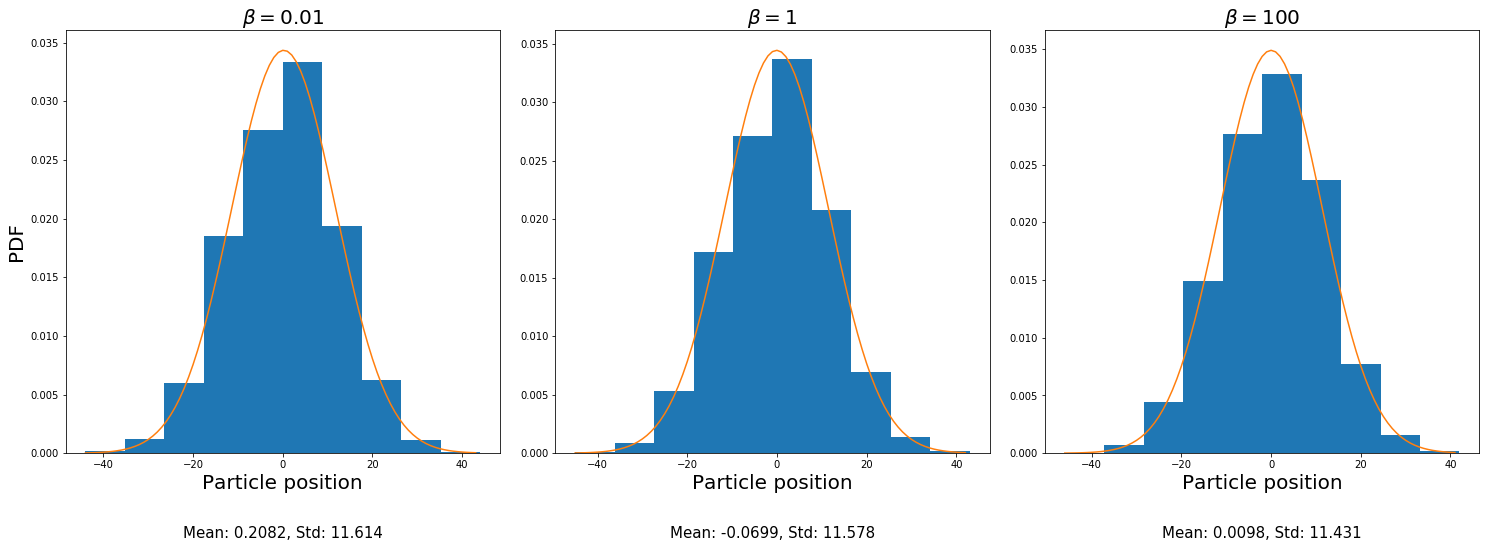

In [4]:
# Potential number one, the constant k is with betaAndK in getResult
@jit(nopython=True)
def V_1(x):
    return 1

result1 = get_result(V_1,beta_k[0])
result2 = get_result(V_1,beta_k[1])
result3 = get_result(V_1,beta_k[2])
plot_normhist(result1, result2, result3)

  

### Discussion 4.1
The figures show that the mean is approximately zero.
The resulting distribution of particles is insignificantly influenced by a change in $\beta k$. This is reasonable, since the potential $V$ is constant, and therefore does not create a concentration gradient. This means that the potential does not change the way the diffusion takes place. It is also apparent that the mathematical probabilites in 3.2 become $p^+ = p^0 = p^- = \frac {1}{3}$, which further explains why the particle distribution closely resembles a normal distribution. 

## Programming exercise 4.2:

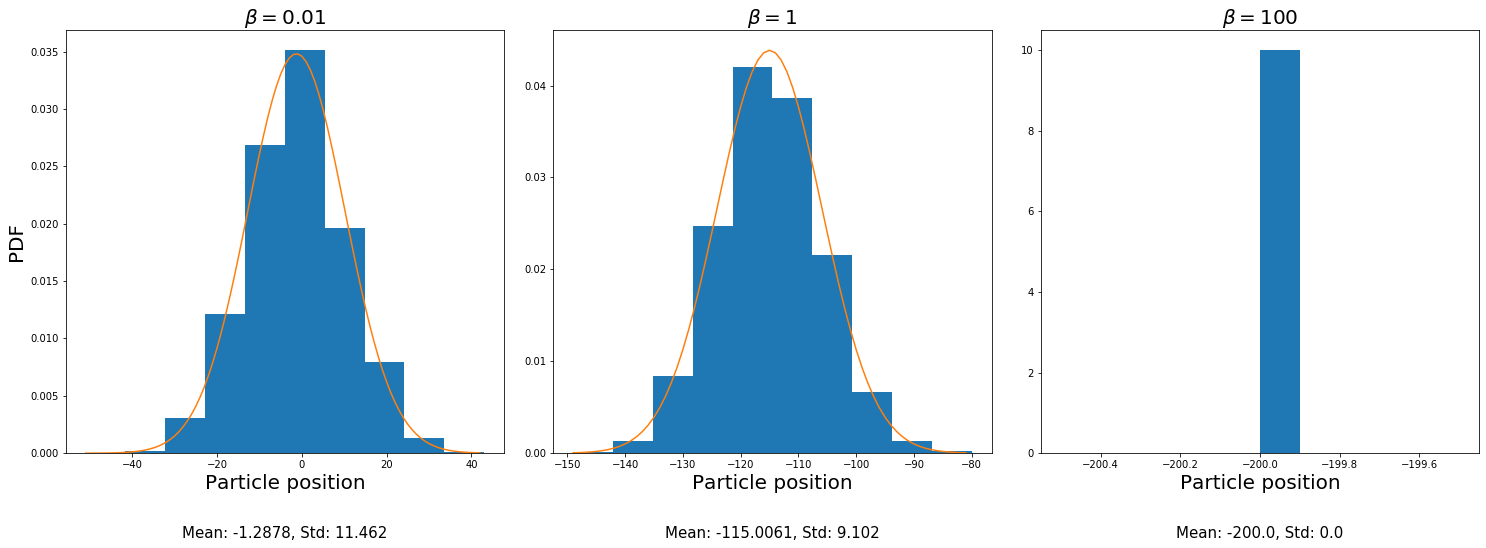

In [5]:
@jit(nopython=True)
def V_2(x):
    return x

result1 = get_result(V_2,beta_k[0])
result2 = get_result(V_2,beta_k[1])
result3 = get_result(V_2,beta_k[2])

plot_normhist(result1, result2, result3)

### Discussion 4.2

The mean in the figures can be explained by the fact that the potential $V_2$ is odd, which means that the particles tend towards negative values to minimize their potential. Therefore, the particles should be centered around a negative value, as they clearly are. Furthermore, the value of the mean decreases as $\beta k$ increases, which is explained by the fact that the potential becomes increasingly influential to the movement of the particles as the ratio increases. In other words, the thermal energy dictates less and less of the particles' movements. 

When $\beta k = 0.01$ the distributiom resembles a normal distribution to a great degree. It's resemblance is not quite as clear as for potential $V_1$, but it is still quite clear that the potential does not significantly change the diffusion process.

When $\beta k = 1$ the standard deviation is less and the mean is more negative. The distribution still resembles the normal distribution in the graph, but the values show that the resemblance is not as clear as before. This is because of the stronger influence of te potential compared to when the ratio $\beta k$ was lower. 

When $\beta k = 100$ the particle distribution no longer resembles a normal distribution. This is because the thermal energy no longer significantly dictates the diffusion process, and therefore all the particles will diffuse to a highly negative position. In this manner their potential is lowered.

## Programming exercise 4.3:


Hei: 0 AxesSubplot(0.125,0.125;0.227941x0.755)
Hei: 1 AxesSubplot(0.398529,0.125;0.227941x0.755)
Hei: 2 AxesSubplot(0.672059,0.125;0.227941x0.755)


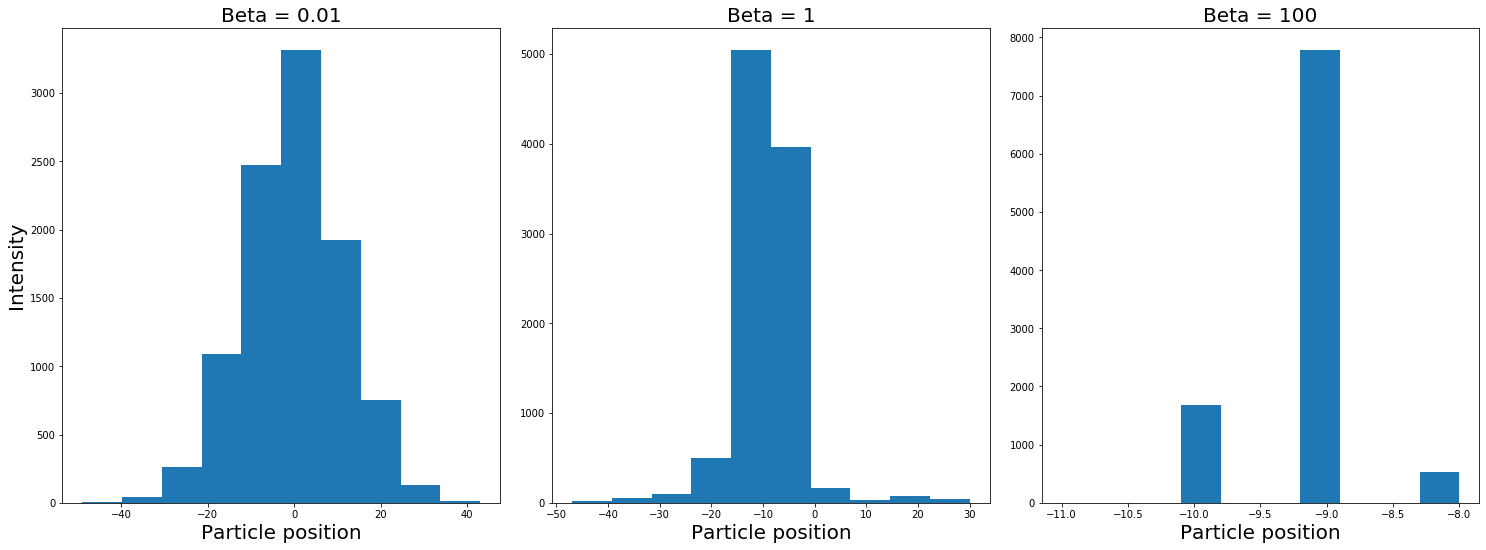

In [6]:
@jit(nopython=True)
def V_3(x):
    return ((x/20)+np.sin(x/5))

result1 = get_result(V_3,beta_k[0])
result2 = get_result(V_3,beta_k[1])
result3 = get_result(V_3,beta_k[2])
plot_hist(result1, result2, result3)

#Ved betaAndK = 0.01 er energien for stor og kommer seg opp av "gropene" i potensialet
#Ved betaAndK = 1 faller nesten alle partiklene i første gropen i potensialfunksjonen, da fordi den termiske energien ikke er stor nok til å komme ut. 
##Såpass konsentrert at det danner ish en normalfordeling inni gropen. Er ikke veldig konsentrert i dette tilfelle
#betaAndK = 100; Får ish 3 datapunkter der nesten alle partiklene er nøyaktig på bunnpunktet og de resterende er 1 eller 2 steglengder unna

#Må kjøre 200 steps for beta:k = 0.01 og så 200 steps for beta_k = 100.



### Discussion 4.3

## Programming exercise 4.4:


Hei: 0 AxesSubplot(0.125,0.125;0.227941x0.755)
Hei: 1 AxesSubplot(0.398529,0.125;0.227941x0.755)
Hei: 2 AxesSubplot(0.672059,0.125;0.227941x0.755)


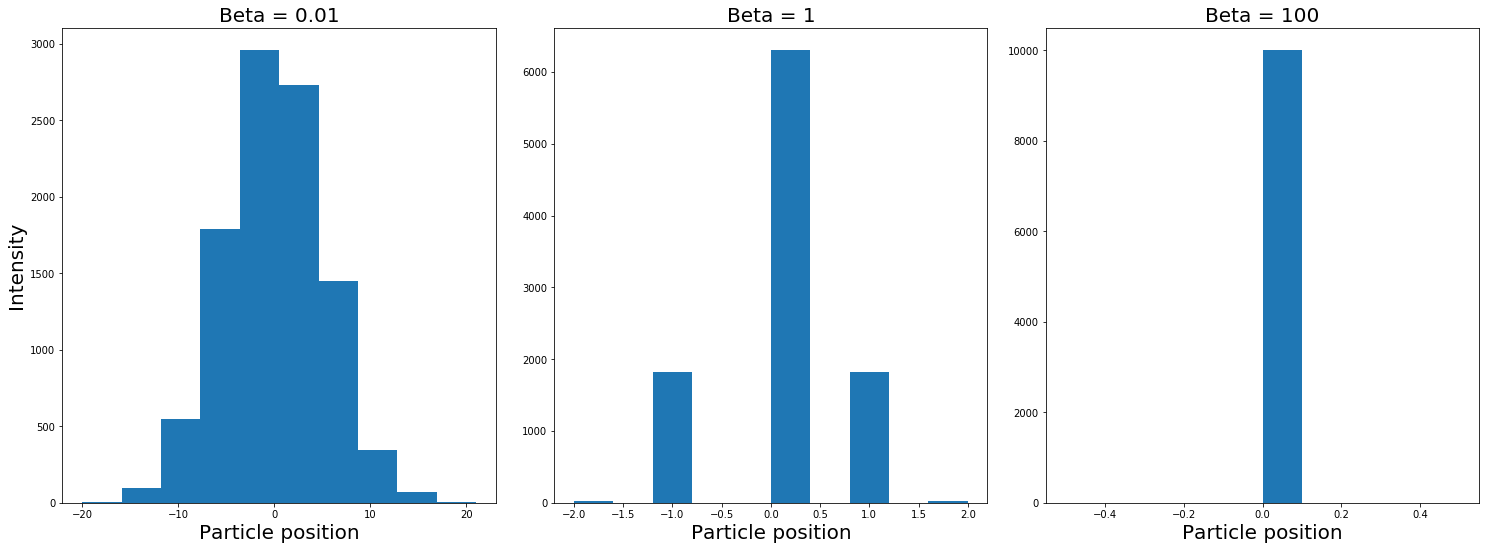

In [8]:
@jit(nopython=True)
def V_4(x):
    return x**2

result1 = get_result(V_4,beta_k[0])
result2 = get_result(V_4,beta_k[1])
result3 = get_result(V_4,beta_k[2])
plot_hist(result1, result2, result3)
#betaAndK = 0.01; Er en jevn-funksjon der det minimale potensiale er i x=0. Her er det litt spredning, men mer konsentrert enn ved konstant potensiale
#betaAndK = 1; Blir bare mer og mer konentrert om x=0
#betaAndK = 100; Blir ett punkt i x=0. Dvs. alle partiklene er i samme posisjon x=0. 

### Discussion 4.4

$\beta k$ cannot be used as a ratio to determine whether the thermal energy or potential energy dominates the random walk behaviour for this potential

# 5 Random walk in a ratchet potential

In [ ]:
alpha = 0.2
@jit(nopython=True)
def V_sawtooth(x): 
  '''
  V_1(x) from the task-description
  '''
  if not (-(1-alpha)*N_x < x <= alpha*N_x): 
      x = x+N_x #periodicity of the function
  if (0 < x <= alpha*N_x):
      return x/(alpha*N_x) 
  else:
      return -1*(x/((1-alpha)*N_x))  

@jit(nopython=True)  
def V_constant(x):
  '''
  V_2(x) from the task-description. 
  Defined constant c = 1, since the magnitude is
  not important. 
  '''
  c = 1
  return c
  
@jit(nopython=True)
def J(n_plus,n_minus):
  '''
  Normalized particle current. 
  '''
  return (n_plus-n_minus)/N_p

def J_avg(current_list):
  '''
  Calculates the average current per cycle. 
  Returns a cycled average current. 
  '''
  average = sum(current_list)/len(current_list)
  return average
        

## 5.1 Programming exercise 5.1

In [ ]:
#Constants
h = 1
alpha = 0.8
T_p = 500 
delta_t = 1
betaK = 1000
N_x = 90  
N_p = 12*N_x
cycles = 10
jumps = 2*cycles

x_first=-89          
x_last = 90          

@jit(nopython=True)
def p_minus_cycle(x_0, V, beta_k): 
  '''
  p_minus as before, modified for periodic x-axis
  '''
  value = 0
  if x_0 == x_first:
      value = 1/(1+e**(-beta_k*(V(x_0+1)-V(x_last)))+e**(-beta_k*(V(x_0)-V(x_last))))
  elif x_0 == x_last:
      value = 1/(1+e**(-beta_k*(V(x_first)-V(x_0-1)))+e**(-beta_k*(V(x_0)-V(x_0-1))))
  else:
      value = 1/(1+e**(-beta_k*(V(x_0+1)-V(x_0-1)))+e**(-beta_k*(V(x_0)-V(x_0-1))))
  return value

@jit(nopython=True)
def p_plus_cycle(x_0, V, beta_k):
  '''
  p_plus as before, modified for periodic x-axis
  '''
  value = 0
  if x_0 == x_first:
      value = 1/(1+e**(-beta_k*(V(x_last)-V(x_0+1)))+e**(-beta_k*(V(x_0)-V(x_0+1))))
  elif x_0 == x_last:
      value = 1/(1+e**(-beta_k*(V(x_0-1)-V(x_first)))+e**(-beta_k*(V(x_0)-V(x_first))))
  else:
      value = 1/(1+e**(-beta_k*(V(x_0-1)-V(x_0+1)))+e**(-beta_k*(V(x_0)-V(x_0+1))))
  return value

@jit(nopython=True)
def fill_particles(x_first):
  '''
  Makes an array with N_p elements, evenly distributed 
  along the x-axis. Ranges from x_first to x_last. 
  '''
  particles = np.zeros(N_p,dtype = np.int64)
  number = x_first
  for i in range(1,len(particles)+1):
      particles[i-1] = number
      if i%6 == 0:
          number += 1
  return particles

@jit(nopython=True)
def get_current_per_time_step(V, init, time_steps):
  '''
  Calculates currents per time step 
  Returns a list of the currents.
  '''
  current_list_per_time_step = []
  for step in range(time_steps):
      countPos = 0
      countNeg = 0
      for position in range(len(init)):
          p = np.random.uniform(0,1)
          if p <= p_minus_cycle(init[position],V, betaK):
              if init[position] == x_first:
                  init[position] = x_last
              else:
                  init[position] -= 1
              countNeg +=1
          elif p > (1-p_plus_cycle(init[position],V, betaK)):
              if init[position] == x_last:
                  init[position] = x_first
              else:
                  init[position] += 1
              countPos +=1
      current_list_per_time_step.append(J(countPos, countNeg))
  return current_list_per_time_step

def get_cycle_averaged_current(particles, V1, V2, T_p, jumps):
  '''
  Calculates the cycle-averaged currents. 
  Returns a list of the averaged currents. 
  '''
  average_currents = []
  for i in range(jumps):
      if i%2 == 0:
          currents_per_time_step = get_current_per_time_step(V2,particles,T_p)
          current_list = currents_per_time_step
      else:
          currents_per_time_step = get_current_per_time_step(V1,particles,T_p)
          current_list += currents_per_time_step
          average_currents.append(J_avg(current_list))
  return average_currents

particles = fill_particles(x_first) 
print(get_cycle_averaged_current(particles,V_sawtooth, V_constant,T_p, jumps))

### Discussion 5.1

* Why we get non-zero currents: 

The potential is not symmetric, which means that there will be a current towards one of the sides. When $\alpha = 0.2$ the potential is "leaning" to the left, which is why we get currents that tend towards the left. 

***Needs to be explained more clearly! (better physical interpretation!)***

* Compare $J_{avg}(0)$ with $J_{avg}(n)$ for n > 0:

It is apparent that the averaged current during the first cycle is bigger than the other cycle-averaged currents. The fact that particles seek to minimize their potential energy can be used to give a physical interpretaion of this observation. The particles are the furthest from the positions of lowest potential in the beginning, when they are uniformly distributed. Therefore, they will move less during each cycle as the numberof cycles increases. Based on this, the first cycle-average current must be the largest of the bunch. However, the currents should decrease monotonically, based on the same logic. This does not happen, as we can see. This could be a result of natural motions/vibrations amongst the paerticles, since they have kinetic energy (Or just Brownian motion?).

***But why don't the rest of the currents decrease monotonically? Is this a consequence of natural vibrations/motion? Temperature? Discuss!***

* Comparison: $\alpha = 0.2$ vs $\alpha = 0.8$:

The potential has the same shape with both these values of $\alpha$, but the entire potential function is flipped by 180 degrees on the x-axis ***Finner ikke bedre ord for dette på engelsk akk nå!***. Therefore, it is expected that the values of the cycle-averaged currents should be equal, but with flipped signs. We can observe that this is/is not the case from the data we simulated. ***Er noe litt rart med strømmene fortsatt, da jeg får omtrent samme verdier uansett alpha (negative verdier)?!*** 

## Programming exercise 5.2

The two x-coordinates which coincide with the minima of $V_1(x)$ must be $x = 0$ and $x = 0 + nN_x$, since it is periodic. The part of $V_1(x)$ which lies within $0 < x \leq \alpha N_x$ is a rising function, which means that it's minima is when $x$ is the smallest $\Rightarrow$ $x = 0$.The other part of $V_1(x)$ is a descending function, which means that it's minima is at the highest possible $x$ value in the interval $\Rightarrow$ x = 0. However, since the potential is periodic, we have one more minima at $x = N_x$. 

In [ ]:
def reset_positioning():
  '''
  Places half of the elements at each of the x-coordinates 
  which coincide with the minima of V_sawtooth()
  '''
  particles = np.zeros(N_p,dtype = np.int64)
  for i in range(len(particles)):
    if i < (len(particles)/2):
      particles[i] = 0
    else: 
      particles[i] = N_x 
  return particles


T_p_values = np.linspace(1,500,50)
N_p = 40*N_x
alpha = 0.8
cycles = 1


average_currents = []
for T_p_index in range(1, len(T_p_values) + 1):
  particles = reset_positioning()
  average_currents += get_cycle_averaged_current(particles, V_sawtooth, V_constant, T_p_index, 2*cycles)
print(average_currents)

plt.plot(T_p_values, average_currents)
plt.show()
    

#### Observations: 



## Programming exercise 5.3

In [ ]:
T_p = 500
alpha_values = np.linspace(0,1,50)
N_p = 12*N_x


average_currents = []
for alphay in alpha_values:
  global alpha #Unsure if this works!
  alpha = alphay
  particles = reset_positioning()
  #Need to make alpha change in each of these function calls!
  average_currents += get_cycle_averaged_current(particles, V_sawtooth, V_constant, T_p, 2*cycles)
print(average_currents)

plt.plot(alpha_values, average_currents)
plt.show()

#### Observations: 

# 6 Analytical solution

## Programming exercise 6.1

## Programming exercise 6.2

## Programming exercise 6.3

## Exercise 6.4